In [2]:
import os
from glob import glob

import numpy as np
from PIL import Image
import cv2


import matplotlib.pyplot as plt



In [3]:
data_path = glob('*.jpg')
data_path

['cat.jpg', 'cat2.jpg', 'cat3.jpg', 'cat4.jpg', 'dog.jpg']

In [13]:
image_pil = Image.open(data_path[0])
image = np.array(image_pil)
image.shape

(1279, 1920, 3)

In [17]:
image[0][0]

array([58, 47, 51], dtype=uint8)

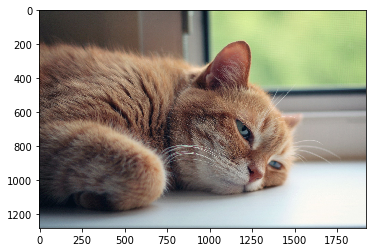

In [15]:
plt.imshow(image)

In [19]:
image = cv2.imread(data_path[0])
image.shape

(1279, 1920, 3)

In [20]:
image[0][0]

array([51, 48, 57], dtype=uint8)

In [11]:
type(image)

numpy.ndarray

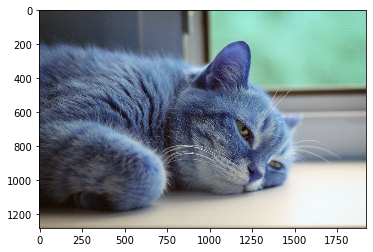

In [12]:
plt.imshow(image)

### opcncv 는 RGB가 아닌 BGR로 사진을 열ㅇ어준다

In [21]:
# BGR을 RGB로 바꿔주자
b, g, r = cv2.split(image)
image = cv2.merge((r,g,b))

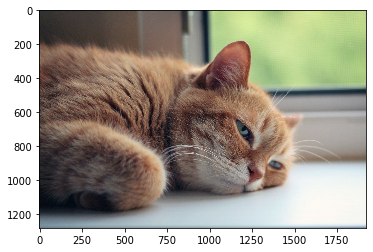

In [22]:
plt.imshow(image)

# Resize

In [23]:
image.shape

(1279, 1920, 3)

In [25]:
resized = cv2.resize(image, (256,128))
resized.shape

(128, 256, 3)

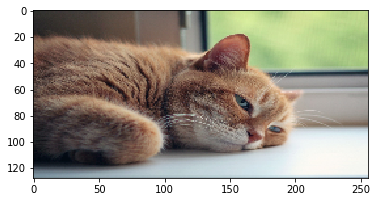

In [27]:
plt.imshow(resized)
plt.show()

# interpolation
- linear 가운데 값으로 맞춰줌
- nearest neighbour 가까운값으로 체워줌

In [28]:
resized = cv2.resize(image, (256,128), cv2.INTER_CUBIC)
resized.shape

(128, 256, 3)

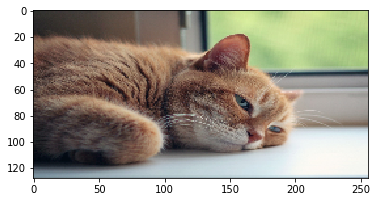

In [29]:
plt.imshow(resized)
plt.show()

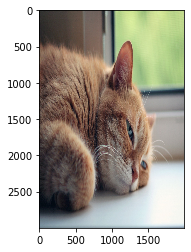

# Morphological Transformations

### Erosion
가장 작은값으로 줄여줌 다이어트를 시켜준다는 느낌?

In [39]:
image.shape
resized = cv2.resize(image, (256,128))
resized.shape

(128, 256, 3)

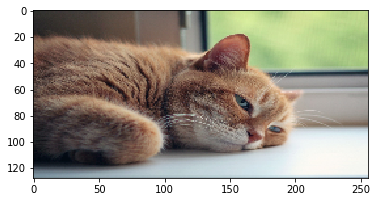

In [41]:
plt.imshow(resized,'gray')
plt.show()

In [42]:
kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(resized, kernel, iterations=1)

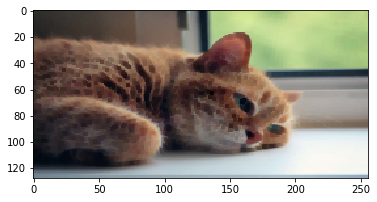

In [43]:
plt.imshow(erosion)

### Dilation

In [46]:
kernel = np.ones((2,2), np.uint8)
dilation = cv2.dilate(resized, kernel, iterations=1)

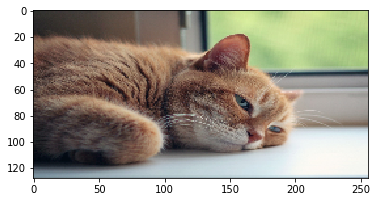

In [47]:
plt.imshow(resized,'gray')
plt.show()

# Image Grdient

- Sobel
- Laplacian

In [49]:
laplcian = cv2.Laplacian(resized, cv2.CV_64F)
SOBELX = cv2.Sobel(resized, cv2.CV_64F, 1, 0, ksize=5)
SOBELY = cv2.Sobel(resized, cv2.CV_64F, 0, 1, ksize=5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


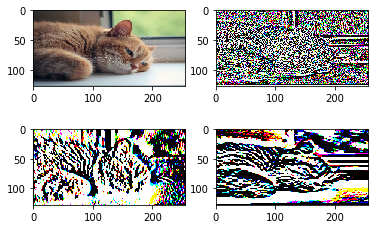

In [50]:
plt.subplot(221)
plt.imshow(resized)

plt.subplot(222)
plt.imshow(laplcian)

plt.subplot(223)
plt.imshow(SOBELX)

plt.subplot(224)
plt.imshow(SOBELY)


### Canny Edge

1. 가우시안 필터를 통해 Noise 제거
2. Sobel X 와 Sobel Y를 합침

In [52]:
image_pil = Image.open(data_path[1]).convert("L")
image = np.array(image_pil)
image.shape

(1125, 1125)

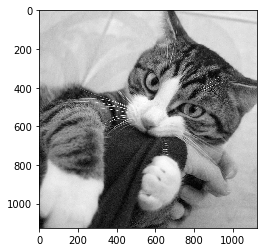

In [54]:
plt.imshow(image,'gray')

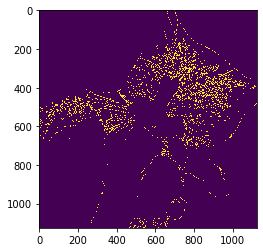

In [55]:
edges = cv2.Canny(image,100,200)
plt.imshow(edges)
plt.show()